In [2]:
from PIL import Image
im = Image.open("img.png")

In [3]:
from __future__ import print_function
print(im.format, im.size, im.mode)
im_width, im_height = im.size

PNG (225, 225) P


In [4]:
im = im.convert("1")

In [5]:
im.show()

In [6]:
import numpy as np
p = np.array(im,dtype=int)

In [10]:
n = int(input("Enter No of Participents: "))
print("Enter info about the access structure:")
# g0 = int(input("Enter the no of sub-sets in the access structure")) 
# # for i in range(g0):

G = [[[1,2],[2,3]],[[1,4],[3,4]]]
print(G)

Enter No of Participents: 4
Enter info about the access structure:
[[[1, 2], [2, 3]], [[1, 4], [3, 4]]]


In [11]:
a,b = map(set,G[0])
# print("a,b: ",a,b)
in_section = a & b
# print("in_section: ", in_section)
union = (a | b) - in_section 
# print("union: ",union)

s00 = np.zeros((n,2))
s01 = np.zeros((n,2))

for i in in_section:
    s00[i-1,0]= s01[i-1,0] = 0    
    s00[i-1,1]= s01[i-1,1] = 1
for i in union:
    s00[i-i,0]= s01[i-1,1] = 0
    s00[i-1,1]= s01[i-1,0] = 1

    
print("s00: ",s00)
print()
print("s01 :",s01)

s00:  [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]]

s01 : [[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]]


In [12]:
a,b = map(set,G[1])
# print("a,b: ",a,b)
in_section = a & b
# print("in_section: ", in_section)
union = (a | b) - in_section 
# print("union: ",union)

s10 = np.zeros((n,2))
s11 = np.zeros((n,2))

for i in in_section:
    s10[i-1,0]= s11[i-1,0] = 0    
    s10[i-1,1]= s11[i-1,1] = 1
for i in union:
    s10[i-i,0]= s11[i-1,1] = 0
    s10[i-1,1]= s11[i-1,0] = 1

    
print("s10: ",s10)
print()
print("s11 :",s11)



s10:  [[0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]]

s11 : [[1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]]


In [13]:
s0 = np.hstack((s00,s10))
s1 = np.hstack((s01,s11))

print(s0)
print()
print(s1)

[[0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]]

[[1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]]


## Random Permutation

In [128]:
print(s0)
print()
print(np.random.permutation(s0.T).T)

[[0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]]

[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [122]:
print (s0[:, np.random.permutation(s0.shape[1])])

[[1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [111]:
np.random.permutation(s0.shape[1])

array([2, 1, 0, 3])

In [120]:
s0[:,[0,2,3,1]]

array([[0., 0., 1., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 0.]])

In [119]:
np.random.permutation(s0.shape[1])

array([2, 1, 3, 0])

In [135]:
print(s0[1,:])
s0[1,:].reshape((2,2))

[0. 1. 0. 0.]


array([[0., 1.],
       [0., 0.]])

## Share Gen

In [14]:
import matplotlib.pyplot as plt

In [15]:
share1 = np.zeros([2*im_width, 2* im_height], dtype=int)
share2 = np.zeros([2*im_width, 2* im_height], dtype=int)
share3 = np.zeros([2*im_width, 2* im_height], dtype=int)
share4 = np.zeros([2*im_width, 2* im_height], dtype=int)

In [16]:
# plt.imshow(share1)
# im_share1 = Image.fromarray(share1)
# im_share1.save("share1.pbm")


In [17]:
irow = 0
icol = 0
for py in p:
    for px in py:
        if px == 0:
            s1 = np.random.permutation(s1.T).T
            share1[irow, icol] = s1[0][0]
            share2[irow, icol] = s1[1][0]
            share3[irow, icol] = s1[2][0]
            share4[irow, icol] = s1[3][0]

            share1[irow+1, icol] = s1[0][2]
            share2[irow+1, icol] = s1[1][2]
            share3[irow+1, icol] = s1[2][2]
            share4[irow+1, icol] = s1[3][2]

            share1[irow+1, icol+1] = s1[0][3]
            share2[irow+1, icol+1] = s1[1][3]
            share3[irow+1, icol+1] = s1[2][3]
            share4[irow+1, icol+1] = s1[3][3]

            share1[irow, icol+1] = s1[0][1]
            share2[irow, icol+1] = s1[1][1]
            share3[irow, icol+1] = s1[2][1]
            share4[irow, icol+1] = s1[3][1]

            icol += 2

        
        else :
            s0 = np.random.permutation(s0.T).T
            share1[irow, icol] = s0[0][0]
            share2[irow, icol] = s0[1][0]
            share3[irow, icol] = s0[2][0]
            share4[irow, icol] = s0[3][0]

            share1[irow+1, icol] = s0[0][2]
            share2[irow+1, icol] = s0[1][2]
            share3[irow+1, icol] = s0[2][2]
            share4[irow+1, icol] = s0[3][2]

            share1[irow+1, icol+1] = s0[0][3]
            share2[irow+1, icol+1] = s0[1][3]
            share3[irow+1, icol+1] = s0[2][3]
            share4[irow+1, icol+1] = s0[3][3]

            share1[irow, icol+1] = s0[0][1]
            share2[irow, icol+1] = s0[1][1]
            share3[irow, icol+1] = s0[2][1]
            share4[irow, icol+1] = s0[3][1]

            icol += 2
    irow +=2
    icol = 0


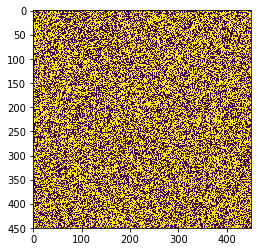

In [18]:
plt.imshow(share1)

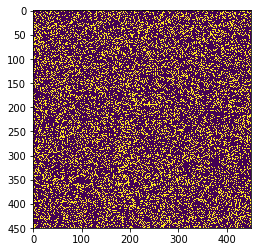

In [19]:
plt.imshow(share2)

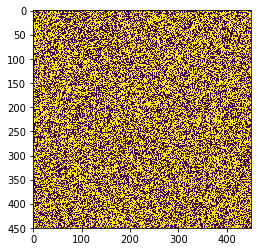

In [20]:
plt.imshow(share3)

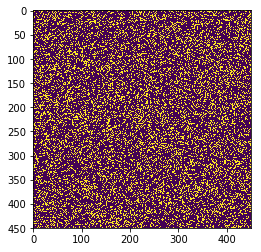

In [21]:
plt.imshow(share4)

## Combine Share

In [22]:
x,y = share1.shape
secret = np.ones([x,y],dtype=int)

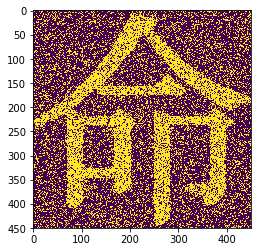

In [33]:
for i in range(x):
    for j in range(y):
        secret[i,j] = (share1[i,j]+share2[i,j])%2
plt.imshow(secret)


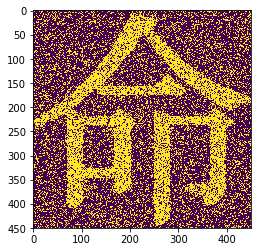

In [24]:
for i in range(x):
    for j in range(y):
        secret[i,j] = (share3[i,j]+share2[i,j])%2
plt.imshow(secret)

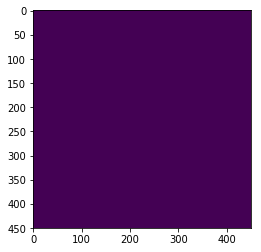

In [25]:
for i in range(x):
    for j in range(y):
        secret[i,j] = (share1[i,j]+share3[i,j])%2
plt.imshow(secret)

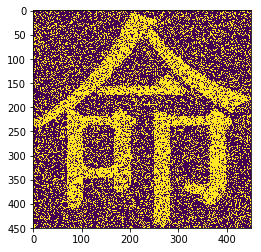

In [26]:
for i in range(x):
    for j in range(y):
        secret[i,j] = (share1[i,j]+share4[i,j])%2
plt.imshow(secret)

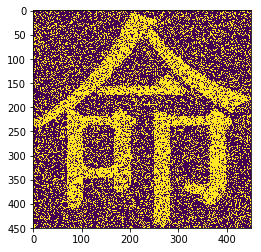

In [27]:
for i in range(x):
    for j in range(y):
        secret[i,j] = (share3[i,j]+share4[i,j])%2
plt.imshow(secret)

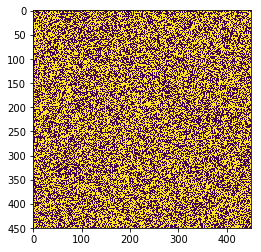

In [28]:
for i in range(x):
    for j in range(y):
        secret[i,j] = (share2[i,j]+share4[i,j])%2
plt.imshow(secret)

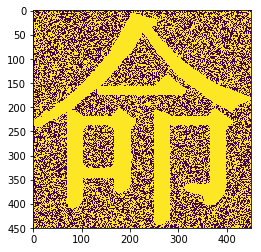

In [34]:
for i in range(x):
    for j in range(y):
        secret[i,j] = share3[i,j] or share2[i,j] or share1[i,j] or share4[i,j]
plt.imshow(secret)
img = Image.fromarray(secret)

In [37]:
img.show()

ValueError: Colormap Gray is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

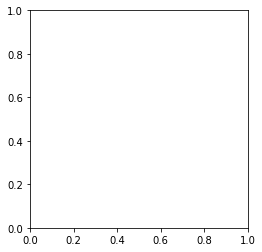

In [40]:
for i in range(x):
    for j in range(y):
        secret[i,j] = ( share2[i,j] + share1[i,j])%2
plt.imshow(secret, "Gray")

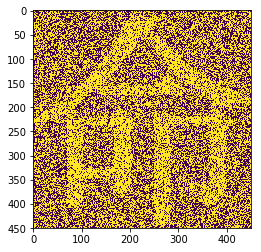

In [31]:
for i in range(x):
    for j in range(y):
        secret[i,j] = ( share2[i,j] or share1[i,j])
plt.imshow(secret)